# Real Estate Analysis 🏠
## Author: Thi Thu Hien LE

The Realestate.csv file contains historical property valuation data gathered from a city in Taiwan. I received this dataset through Western Sydney University as part of practical coursework and exercises. All rights belong to the original data provider and the university materials from which it was supplied.

In [9]:
import pandas as pd

# Load dataset
Realestate = pd.read_csv("Realestate.csv")

# View basic information
print(Realestate.head())
print("\nShape:", Realestate.shape)
print("\nColumns:", Realestate.columns.tolist())
print("\nData Types:\n", Realestate.dtypes)


    age  year  distanceMRT  convstore    price
0  14.8  2012       393.26          6   736.97
1  17.4  2012      6488.02          1  1086.06
2  16.0  2012      4066.59          0  1124.85
3  30.9  2012      6396.28          1  1183.03
4  16.5  2012      4082.02          0  1241.21

Shape: (413, 5)

Columns: ['age', 'year', 'distanceMRT', 'convstore', 'price']

Data Types:
 age            float64
year             int64
distanceMRT    float64
convstore        int64
price          float64
dtype: object


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

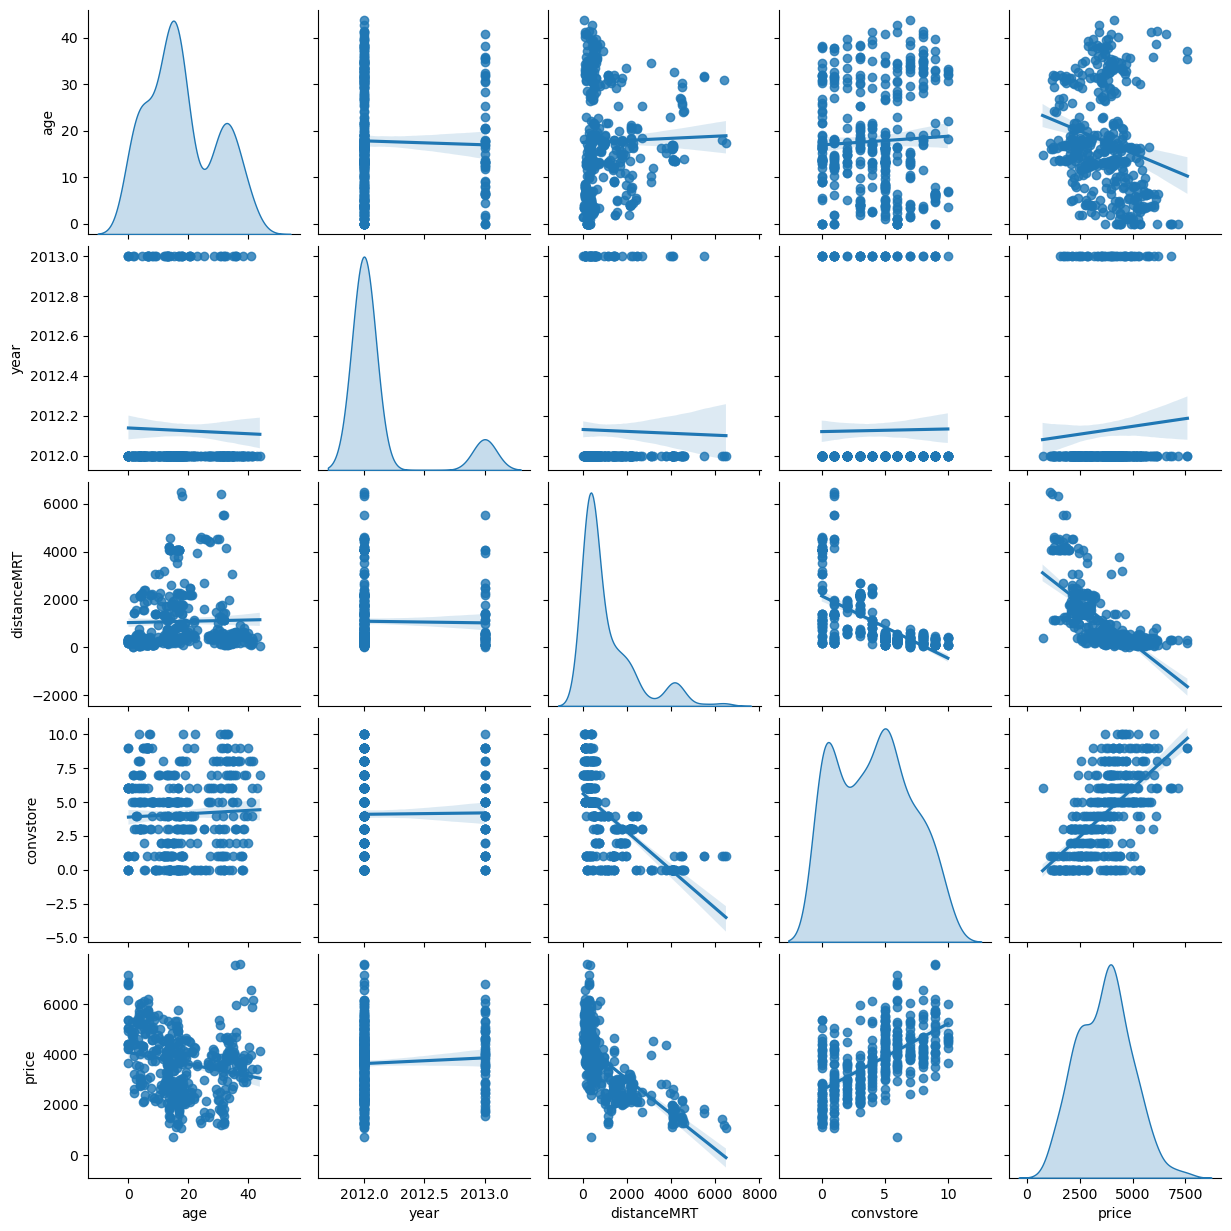

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot (similar to R's pairs())
sns.pairplot(Realestate, kind="reg", diag_kind="kde")
plt.show()

In [11]:
# Correlation matrix
corr_matrix = Realestate.corr()
print(corr_matrix)

                  age      year  distanceMRT  convstore     price
age          1.000000 -0.024820     0.024676   0.048131 -0.210985
year        -0.024820  1.000000    -0.018074   0.011691  0.059342
distanceMRT  0.024676 -0.018074     1.000000  -0.605328 -0.694009
convstore    0.048131  0.011691    -0.605328   1.000000  0.612635
price       -0.210985  0.059342    -0.694009   0.612635  1.000000


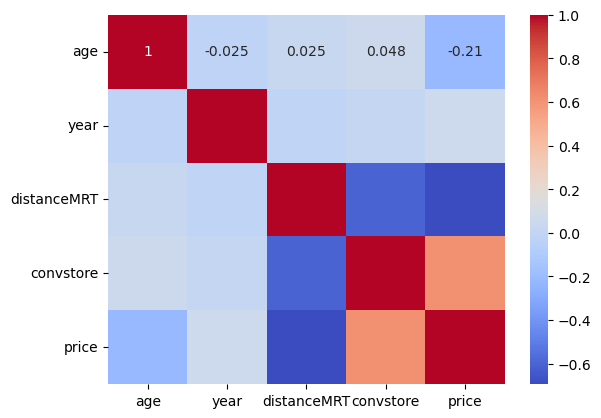

In [12]:
# Heatmap for clear visualisation
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [13]:
import statsmodels.formula.api as smf

# Fit the simple linear regression
model_simple = smf.ols('price ~ distanceMRT', data=Realestate).fit()

print(model_simple.summary())

prediction = model_simple.predict({'distanceMRT': 500})
print("Predicted price for 500m from MRT:", prediction.iloc[0])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     381.9
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.28e-60
Time:                        11:12:02   Log-Likelihood:                -3399.8
No. Observations:                 413   AIC:                             6804.
Df Residuals:                     411   BIC:                             6812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4419.1338     59.209     74.636      

In [14]:
# Full model
model_full = smf.ols('price ~ age + year + convstore', data=Realestate).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     105.1
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.82e-50
Time:                        11:12:04   Log-Likelihood:                -3417.5
No. Observations:                 413   AIC:                             6843.
Df Residuals:                     409   BIC:                             6859.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.502e+05   2.85e+05     -1.230      0.2

In [15]:
# Remove insignificant variable (year)
model_reduced = smf.ols('price ~ age + convstore', data=Realestate).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     156.7
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.75e-51
Time:                        11:12:06   Log-Likelihood:                -3418.3
No. Observations:                 413   AIC:                             6843.
Df Residuals:                     410   BIC:                             6855.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3038.6131    106.803     28.451      0.0

In [16]:
# Add interaction term distanceMRT * convstore
model_interaction = smf.ols('price ~ age + convstore + distanceMRT*convstore', 
                            data=Realestate).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     165.8
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           3.95e-84
Time:                        11:12:08   Log-Likelihood:                -3336.2
No. Observations:                 413   AIC:                             6682.
Df Residuals:                     408   BIC:                             6703.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4052.44

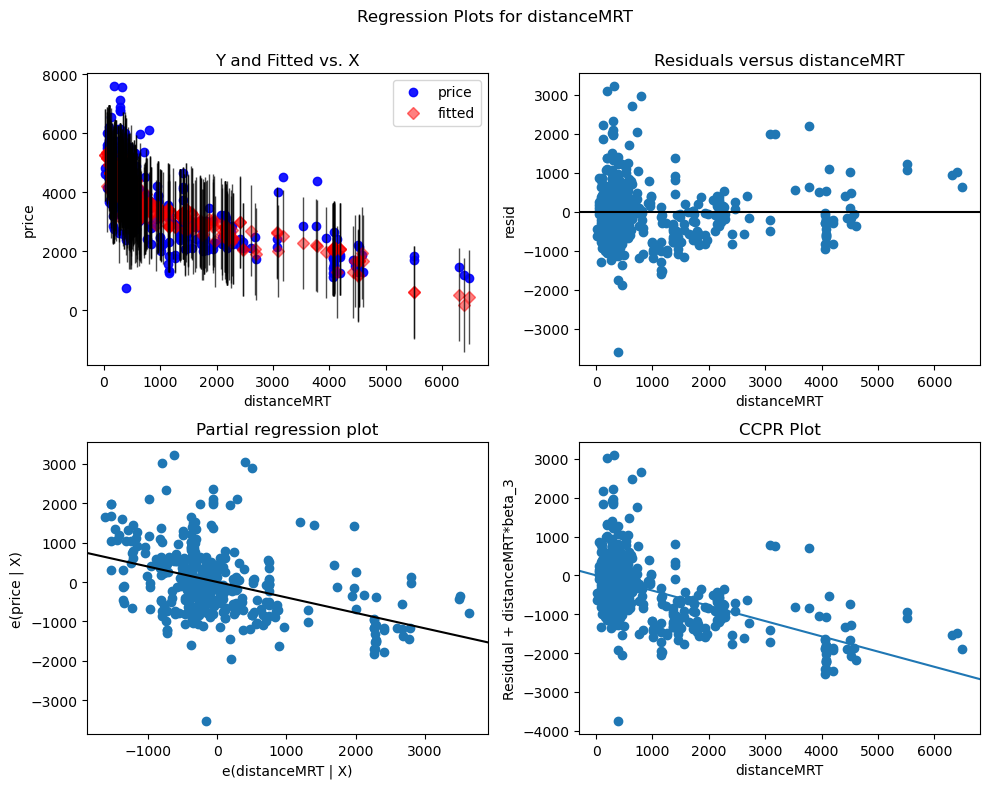

In [17]:
# Model assumptions — diagnostic plots
import statsmodels.api as sm

fig = plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model_interaction, "distanceMRT", fig=fig)
plt.show()


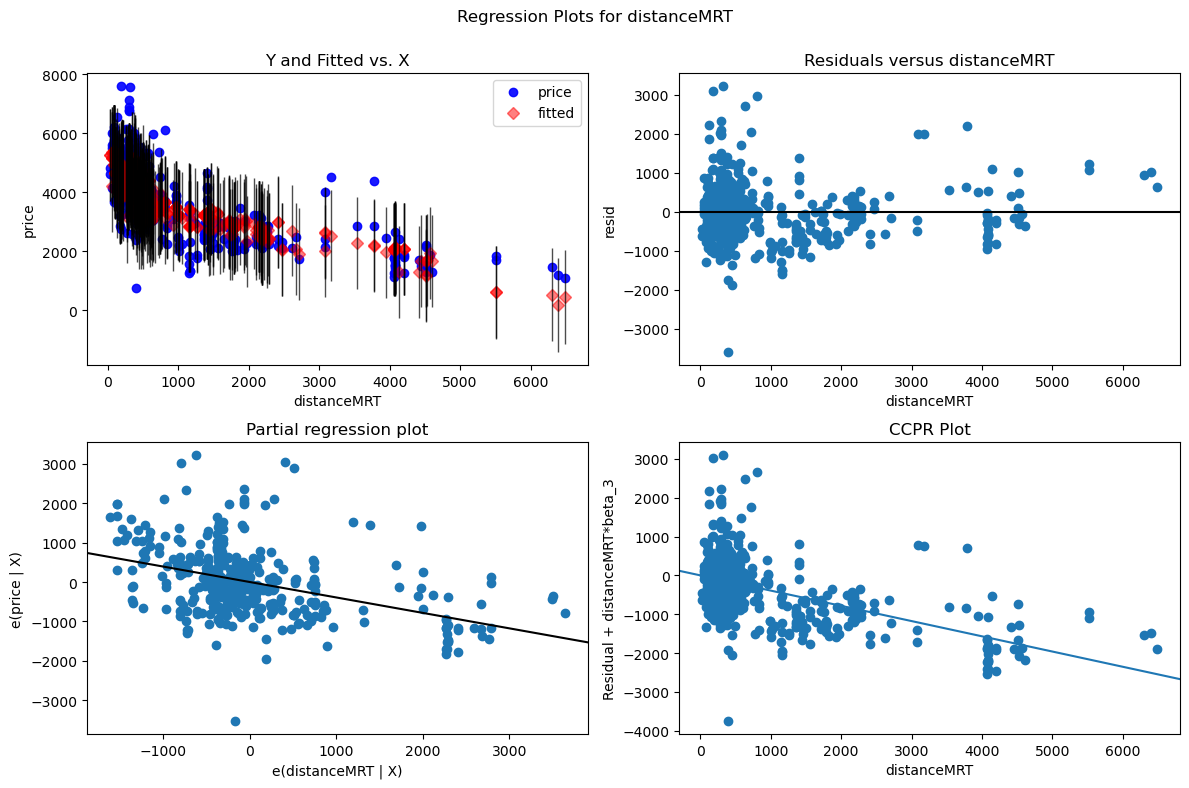

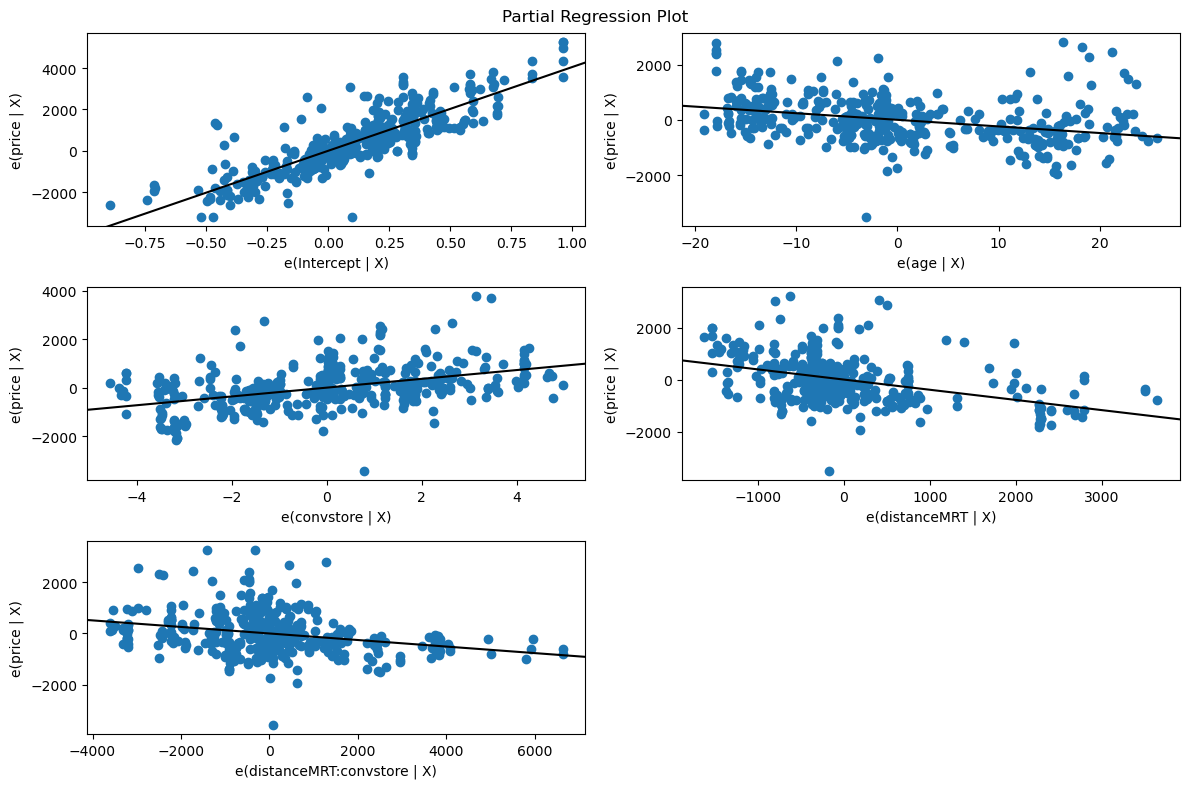

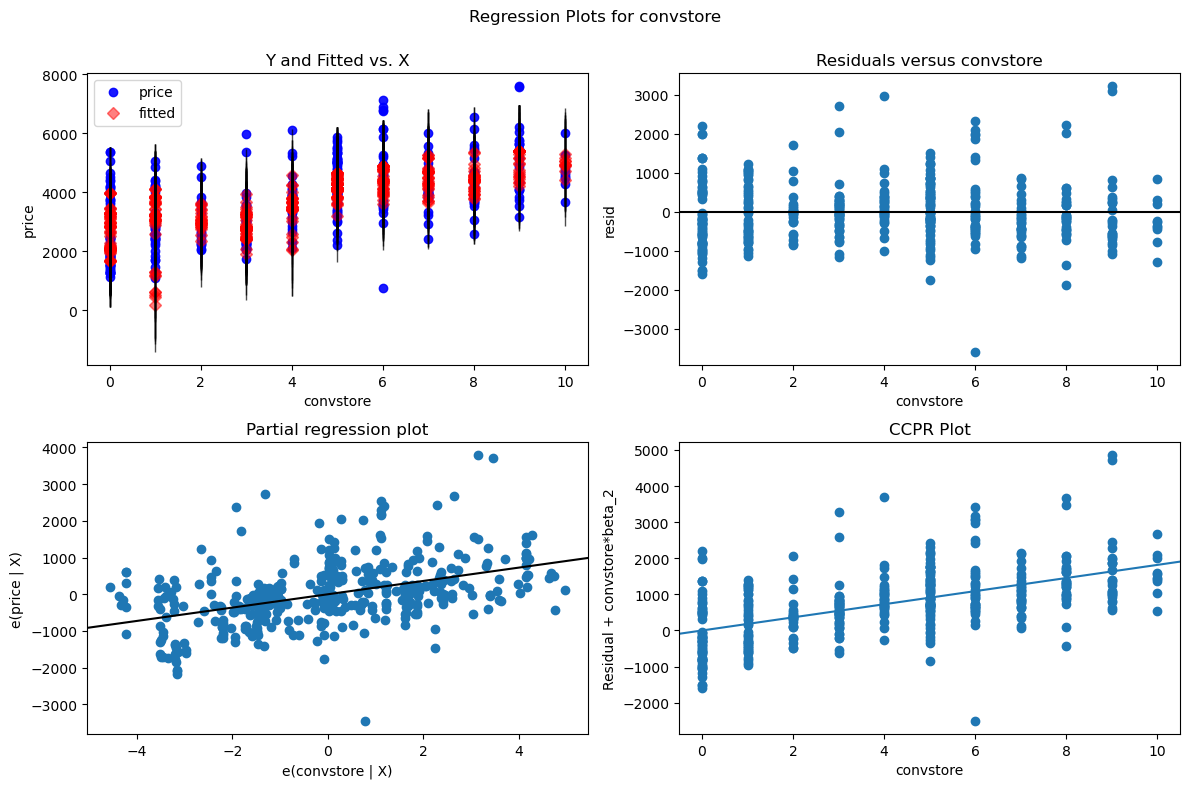

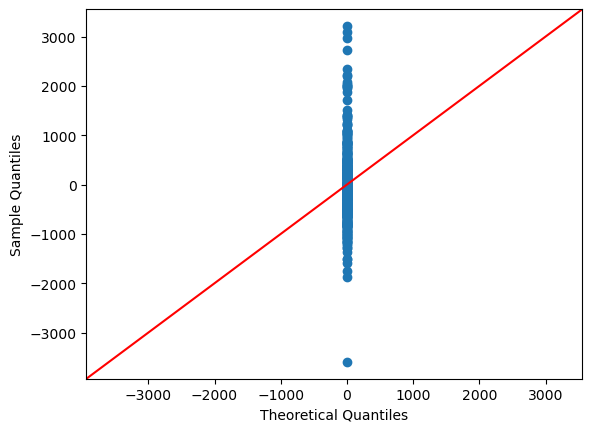

In [18]:
# Combined diagnostic plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model_interaction, "distanceMRT", fig=fig)
plt.show()

fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model_interaction, fig=fig)
plt.show()

fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model_interaction, "convstore", fig=fig)
plt.show()

sm.graphics.qqplot(model_interaction.resid, line="45")
plt.show()

In [19]:
# Polynomial Regression
poly_model = smf.ols(
    'price ~ distanceMRT + I(distanceMRT**2) + I(distanceMRT**3)', 
    data=Realestate
).fit()

print(poly_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.57e-78
Time:                        11:12:36   Log-Likelihood:                -3352.6
No. Observations:                 413   AIC:                             6713.
Df Residuals:                     409   BIC:                             6729.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5070.4420    